In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import re

In [2]:
data = pd.read_csv('shell_asia_reviews_newest.csv')
data.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,A Google user,Nice Appss..,5,0,1.2.5,2025-04-08 08:05:59,NaN,NaN,1.2.5
1,A Google user,Great,5,0,1.2.5,2025-04-08 07:58:47,NaN,NaN,1.2.5
2,A Google user,excellent experience,5,0,1.2.5,2025-04-06 19:28:30,NaN,NaN,1.2.5
3,A Google user,trusted even government itself,5,0,1.2.5,2025-04-06 17:03:14,NaN,NaN,1.2.5
4,A Google user,Ok,5,0,1.2.5,2025-04-05 19:38:43,NaN,NaN,1.2.5


In [3]:
data.shape

(5959, 9)

In [4]:

# Function to remove emojis from content
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_punctuation_space(text):
    return re.sub(r'[^\w\s]', '', text)


# Remove emojis from the content column
data['content'] = data['content'].apply(remove_emojis)

#Reomving whitespace and punctuation
data["content"] = data['content'].apply(remove_punctuation_space)

# remove empty content
data = data[data['content'].str.strip() != '']


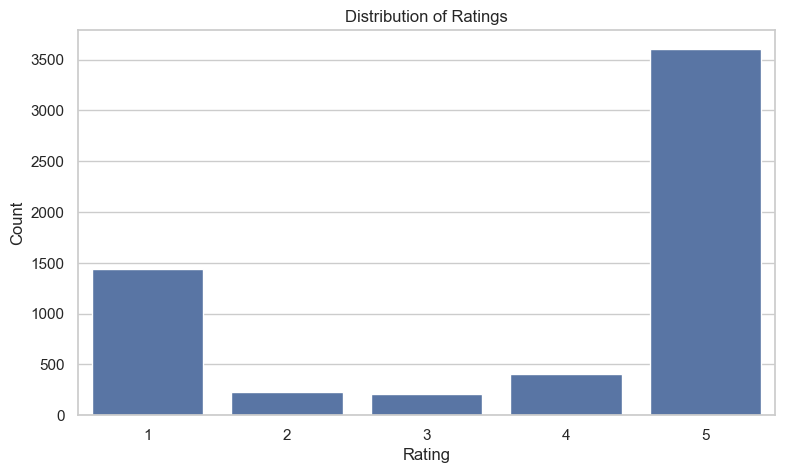

In [5]:
sns.set(style='whitegrid')
plt.figure(figsize=(9,5))
sns.countplot(data=data, x="score")
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

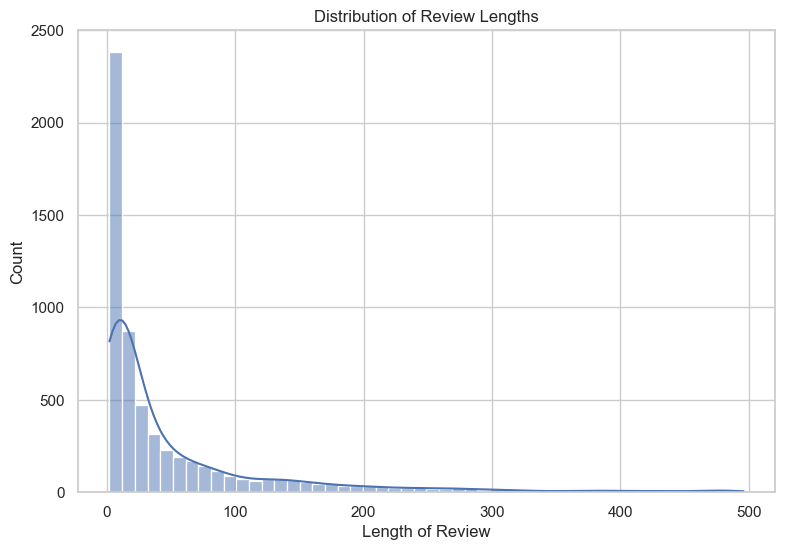

In [6]:
# Calculating the length of each review
data['content_length'] = data['content'].apply(len)

# Plotting the distribution of review lengths
plt.figure(figsize=(9, 6))
sns.histplot(data['content_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

In [7]:
# pip install textblob

In [8]:


def textblob_sentiment_analysis(review):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review).sentiment
    # Classifying based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Applying TextBlob sentiment analysis to the reviews
data["content"] = data.content.str.lower()
data['Sentiment'] = data['content'].apply(textblob_sentiment_analysis)

# Adding columns for polarity and subjectivity
data['Polarity'] = data['content'].apply(lambda review: TextBlob(review).sentiment.polarity)
data['Subjectivity'] = data['content'].apply(lambda review: TextBlob(review).sentiment.subjectivity)


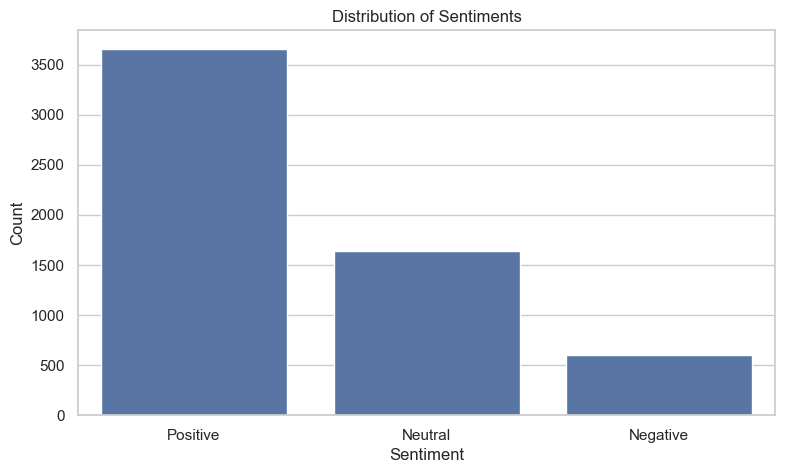

In [9]:
# Analyzing the distribution of sentiments
sentiment_distribution = data['Sentiment'].value_counts()

# Plotting the distribution of sentiments
plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

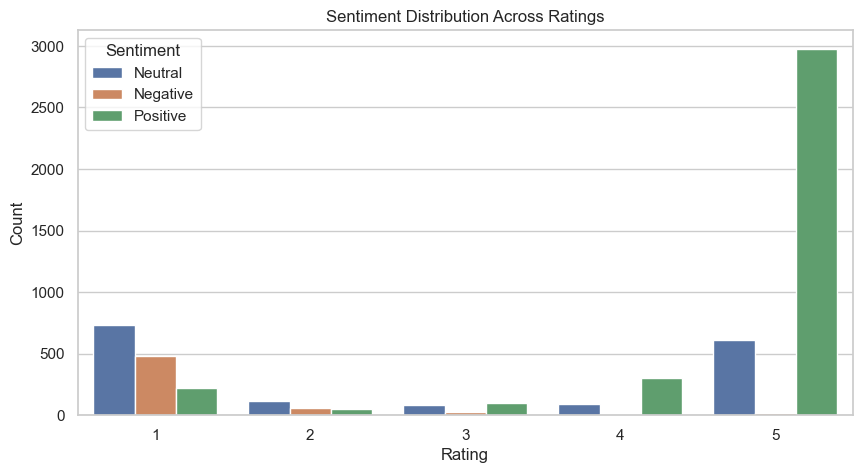

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='score', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [11]:
data.groupby(["score"]).count()

,userName,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_length,Sentiment,Polarity,Subjectivity
score,,,,,,,,,,,,
1,1436,1436,1436,1224,1436,334,334,1224,1436,1436,1436,1436
2,230,230,230,207,230,45,45,207,230,230,230,230
3,212,212,212,196,212,54,54,196,212,212,212,212
4,410,410,410,379,410,113,113,379,410,410,410,410
5,3610,3610,3610,3252,3610,909,909,3252,3610,3610,3610,3610


In [12]:


good_keywords = data[data['content'].str.contains('|'.join(['good']), case=False) & (data['reviewCreatedVersion'] == '1.2.5')]
good_keywords.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_length,Sentiment,Polarity,Subjectivity
23,A Google user,good,5,0,1.2.5,2025-03-31 21:48:01,NaN,NaN,1.2.5,4,Positive,0.70,0.60
25,A Google user,good,5,0,1.2.5,2025-03-31 09:45:11,NaN,NaN,1.2.5,4,Positive,0.70,0.60
26,A Google user,very good petrol pump,5,0,1.2.5,2025-03-30 20:58:23,We are glad you like the experience. Hope to k...,2025-04-04 16:16:05,1.2.5,21,Positive,0.91,0.78
33,A Google user,very good,5,0,1.2.5,2025-03-29 12:37:58,We are glad you like the experience. Hope to k...,2025-04-04 16:16:26,1.2.5,9,Positive,0.91,0.78
38,A Google user,good,5,0,1.2.5,2025-03-28 14:36:10,NaN,NaN,1.2.5,5,Positive,0.70,0.60


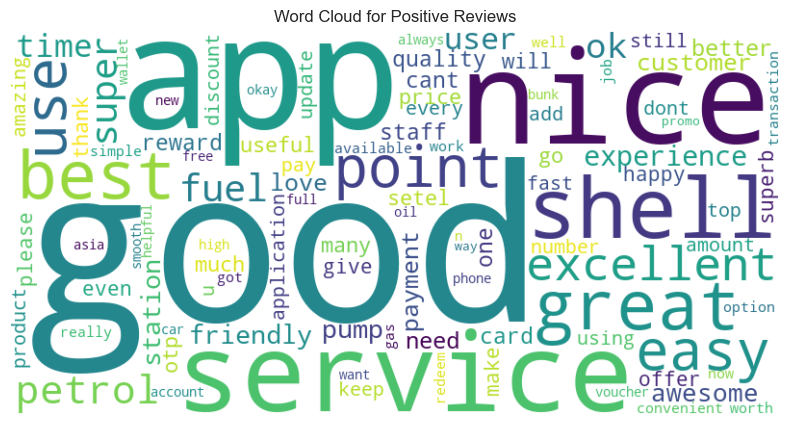

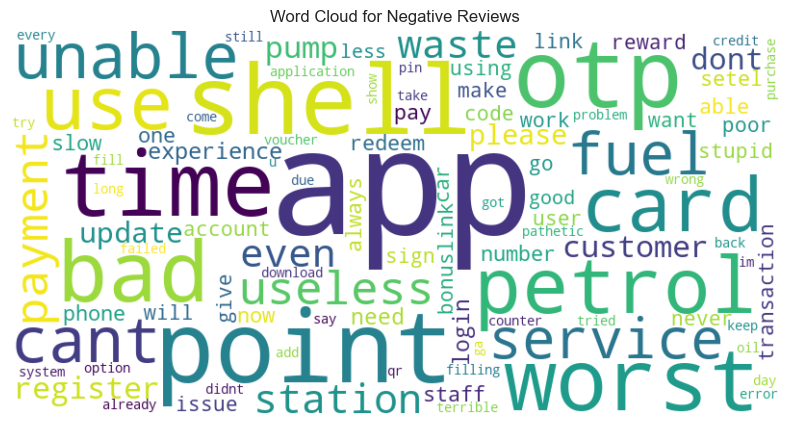

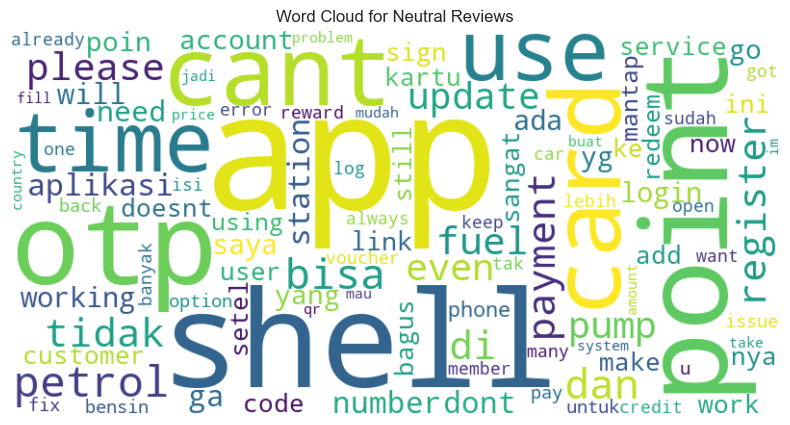

In [13]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords



# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    stopwords= ["good"]
    text = ' '.join(content for content in data[data['Sentiment'] == sentiment]['content'])
    wordcloud = WordCloud(collocations=False, width=  800, height=400,background_color='white',stopwords=STOPWORDS, max_words=100,colormap='viridis',contour_color='steelblue',contour_width=1).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)

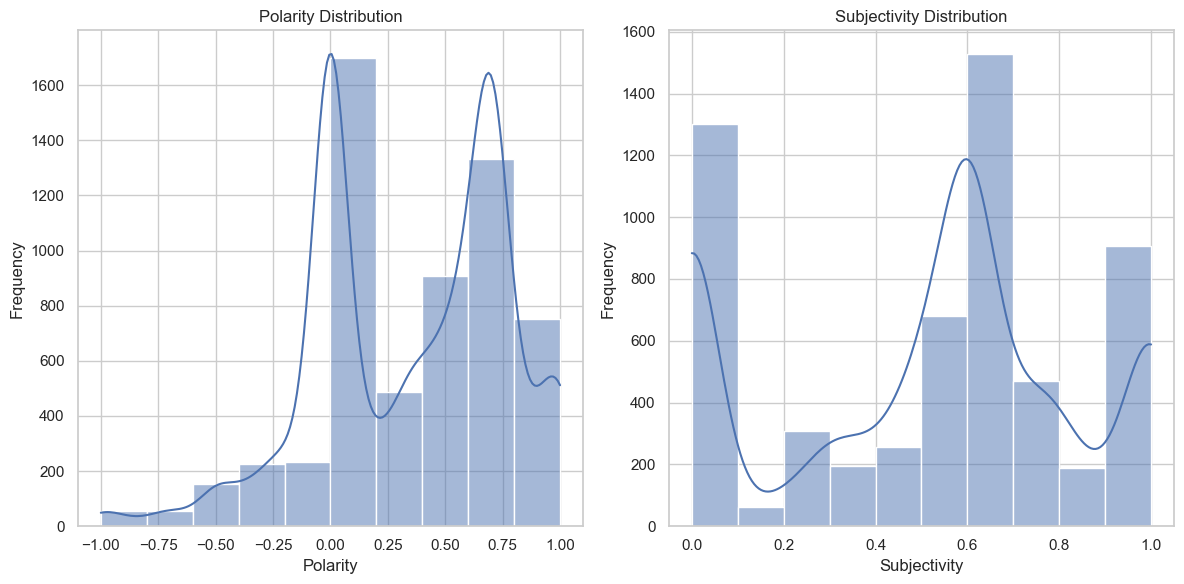

In [14]:
# Plotting the distribution of polarity and subjectivity using seaborn
plt.figure(figsize=(12, 6))

# Polarity distribution plot
plt.subplot(1, 2, 1)
sns.histplot(data['Polarity'], kde=True, bins=10)
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Subjectivity distribution plot
plt.subplot(1, 2, 2)
sns.histplot(data['Subjectivity'], kde=True, bins=10)
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [15]:
data.sort_values(by=['Polarity'], ascending=False).head(10)


,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_length,Sentiment,Polarity,Subjectivity
2,A Google user,excellent experience,5,0,1.2.5,2025-04-06 19:28:30,NaN,NaN,1.2.5,20,Positive,1.0,1.0
5710,J B GAMER,awesome,1,0,1.0.5(18),2021-12-24 18:41:31,NaN,NaN,1.0.5(18),8,Positive,1.0,1.0
12,A Google user,superb experiance,5,0,1.2.5,2025-04-04 07:30:43,NaN,NaN,1.2.5,17,Positive,1.0,1.0
32,A Google user,poonamali team excellent,5,0,1.2.5,2025-03-29 14:46:26,We are glad you like the experience. Hope to k...,2025-04-04 16:16:16,1.2.5,24,Positive,1.0,1.0
839,A Google user,best in customer service,5,0,1.2.4,2024-10-10 20:41:15,NaN,NaN,1.2.4,24,Positive,1.0,0.3
898,A Google user,best,5,0,1.2.4,2024-09-23 12:30:58,NaN,NaN,1.2.4,4,Positive,1.0,0.3
907,A Google user,excellent,5,0,1.2.4,2024-09-20 15:34:38,NaN,NaN,1.2.4,9,Positive,1.0,1.0
908,A Google user,excellent,5,0,1.2.4,2024-09-19 19:04:45,NaN,NaN,1.2.4,9,Positive,1.0,1.0
921,A Google user,excellent,5,0,1.2.4,2024-09-17 22:25:32,NaN,NaN,1.2.4,9,Positive,1.0,1.0
923,A Google user,shell petrol is always the best,5,0,1.2.4,2024-09-17 15:53:22,NaN,NaN,1.2.4,31,Positive,1.0,0.3


In [16]:
data.sort_values(by=['Polarity']).head(10)

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_length,Sentiment,Polarity,Subjectivity
5944,Naman chawath,this app is the worst app we shud never trust ...,1,2,1.0.1,2021-01-12 19:07:17,We are sorry to hear about this. Please contac...,2021-01-27 15:57:02,1.0.1,110,Negative,-1.0,1.0
5914,Akshay Trupmare,worst app,1,0,1.0.1,2021-02-05 20:49:01,Thanks for writing in. We would like to hear m...,2021-02-17 15:32:42,1.0.1,9,Negative,-1.0,1.0
5613,MOINUDDIN 11,worst experience ever,1,0,1.0.5(18),2022-03-03 14:56:08,NaN,NaN,1.0.5(18),21,Negative,-1.0,1.0
5067,Ali Fitri Ruzalan,boring,1,0,NaN,2023-10-15 01:59:18,NaN,NaN,NaN,6,Negative,-1.0,1.0
5957,Sharath Doddamani,worst app,1,5,1.0.1,2020-12-13 02:11:58,Thank you for your feedback. We are constantly...,2021-01-27 16:14:08,1.0.1,9,Negative,-1.0,1.0
5606,Ida Tjandra,im wating for otp but never come up at my mobi...,1,0,1.0.5(18),2022-03-08 06:23:43,NaN,NaN,1.0.5(18),148,Negative,-1.0,1.0
5632,Peps,worst apk and customer service not getting otp...,1,1,1.0.5(18),2022-02-16 18:13:04,NaN,NaN,1.0.5(18),71,Negative,-1.0,1.0
5045,PERFECT THOUGHT,very worst service by shell petrol bunk,1,0,1.0.5(18),2023-11-05 19:44:57,NaN,NaN,1.0.5(18),39,Negative,-1.0,1.0
5869,sabari manikandan,worst app,1,0,1.0.1,2021-03-17 09:05:50,We are sorry to hear about this. Please contac...,2021-04-27 14:05:36,1.0.1,9,Negative,-1.0,1.0
5392,MB Aldifa,my account automatic logout and sign with my p...,1,7,1.0.7,2022-11-24 14:19:37,NaN,NaN,1.0.7,132,Negative,-1.0,1.0


In [17]:
# Sorting the data by polarity to get the top 10 most positive and negative sentiments
top_10_positive = data.nlargest(20, 'Polarity')
top_10_negative = data.nsmallest(20, 'Polarity')


In [18]:

# Displaying the top 10 most positive and negative sentiments
print("Top 10 Most Positive Sentiments:")
top_10_positive[['content', 'Polarity']]


Top 10 Most Positive Sentiments:


,content,Polarity
2,excellent experience,1.0
12,superb experiance,1.0
21,best app,1.0
22,best gas station on indonesia,1.0
31,excellent,1.0
32,poonamali team excellent,1.0
37,best service,1.0
43,awesome,1.0
49,best,1.0
54,excellent,1.0


In [19]:

print("\nTop 10 Most Negative Sentiments:")
print(top_10_negative[['content', 'Polarity']])


Top 10 Most Negative Sentiments:
                                                content  Polarity
4572  one of the worst apps ive ever downloaded alre...      -1.0
4580                   worst service in hubli karnataka      -1.0
4612                           worst app didnt send otp      -1.0
4659  worst apps cant locate the petrol station that...      -1.0
4743                                    worst apps ever      -1.0
4752  cant redeem point need to contact cs but no me...      -1.0
4800  this app is the worst 1  cannot even skip bonu...      -1.0
4935     worst app in the world cannot write otp number      -1.0
5045            very worst service by shell petrol bunk      -1.0
5067                                             boring      -1.0
5119  probably worst app out therewhy the fk credit ...      -1.0
5150  one of the worst experience with this applicat...      -1.0
5272  worst application please dont install showing ...      -1.0
5346  no otp generate after 3 attempt to r

In [20]:
temp = data[data['reviewCreatedVersion'] == '1.2.5']
temp.shape

(331, 13)

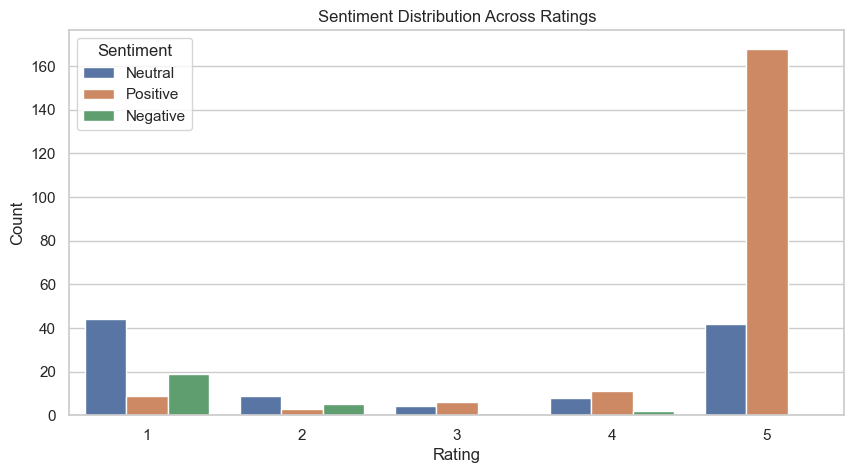

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(data=temp, x='score', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

C:\Users\Kartik.Bhatt\AppData\Local\Temp\ipykernel_28296\2099759367.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sentiment')


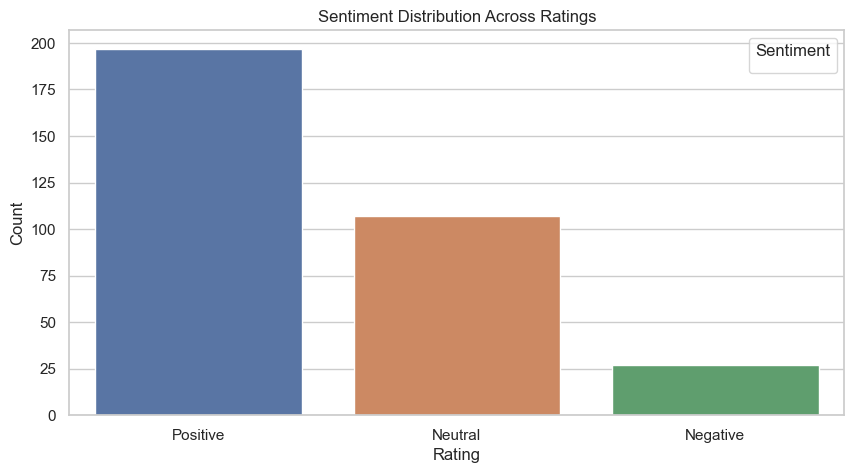

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(data=temp, x='Sentiment', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [23]:



# Filter reviews containing specific keywords
keywords = ['payment','payments', 'smartpay', 'ota', 'card','cards']
filtered_reviews = data[data['content'].str.contains('|'.join(keywords), case=False) ]

# Find the most positive and negative reviews based on polarity
# most_positive_review = filtered_reviews.loc[filtered_reviews['Polarity'].idxmax()]
# most_negative_review = filtered_reviews.loc[filtered_reviews['Polarity'].idxmin()]

# print("Most Positive Review:")
# print(most_positive_review['content'])
# print("\nMost Negative Review:")
# print(most_negative_review['content'])

top_10_latest_positive_reviews = filtered_reviews.nlargest(20, 'Polarity')
top_10_latest_negative_reviews = filtered_reviews.nsmallest(20, 'Polarity')

print("Top 10 Most Positive Reviews:")
print(top_10_latest_positive_reviews[['content', 'Polarity']])

print("\nTop 10 Most Negative Reviews:")
print(top_10_latest_negative_reviews[['content', 'Polarity']])

Top 10 Most Positive Reviews:
                                                content  Polarity
692   good but if i get card like bonuslink card it ...  0.700000
3810      it would be good to support amex card as well  0.700000
226   good job on adding recurring payment very smoo...  0.610000
3120              nice its more easier than hold a card  0.550000
3716  i do think the app is great but it will be mor...  0.550000
4176  this app is very nice but i hope it can add in...  0.532857
1582  senang mengunakan apps ni untuk beli minyak ta...  0.500000
3839  what a convenient way to refuel better when yo...  0.500000
4118  need more options for payment method as debit ...  0.500000
4370  tried many times to redeem voucher  bonus poin...  0.500000
4745  not working taking ages to authorise the pump ...  0.500000
4798  make payment twice but still can not let me pr...  0.500000
4875  need more fixing this app  i try to change my ...  0.500000
2014  seamless registration process you can al

In [24]:
top_10_latest_positive_reviews.to_excel("top_20_positive.xlsx",index=False )
top_10_latest_negative_reviews.to_excel("top_20_negative.xlsx",index=False )

In [25]:
data.to_excel("all_sample_reviews.xlsx", index=False)

In [26]:
filtered_reviews.shape

(335, 13)

In [27]:
filtered_reviews.head()
filtered_reviews.to_excel("filtered_reviews_2025.xlsx", index=False)

In [28]:
# # Convert timestamp column to datetime
# data['at'] = pd.to_datetime(data['at'])

# # Filter reviews from the year 2025
# reviews_2025 = data[data['at'].dt.year == 2025]

# reviews_2025.shape

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(data=reviews_2025, x='score', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

NameError: name 'reviews_2025' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:



# # Filter reviews containing specific keywords
# keywords = ['payment','payments', 'smartpay', 'ota']
# filtered_reviews = reviews_2025[reviews_2025['content'].str.contains('|'.join(keywords), case=False)]

# # Find the most positive and negative reviews based on polarity
# # most_positive_review = filtered_reviews.loc[filtered_reviews['Polarity'].idxmax()]
# # most_negative_review = filtered_reviews.loc[filtered_reviews['Polarity'].idxmin()]

# # print("Most Positive Review:")
# # print(most_positive_review['content'])
# # print("\nMost Negative Review:")
# # print(most_negative_review['content'])

# top_10_positive_reviews = filtered_reviews.nlargest(20, 'Polarity')
# top_10_negative_reviews = filtered_reviews.nsmallest(20, 'Polarity')

# print("Top 10 Most Positive Reviews:")
# print(top_10_positive_reviews[['content', 'Polarity']])

# print("\nTop 10 Most Negative Reviews:")
# print(top_10_negative_reviews[['content', 'Polarity']])

Top 10 Most Positive Reviews:
                                                content  Polarity
224   good job on adding recurring payment. very smo...  0.610000
4075  the new app is much more user-friendly and fas...  0.413939
4537  not user friendly at all. force to make paymen...  0.375000
4093  initially its good but since last year i cant ...  0.233333
3677  the app is good and recommended. only thing wh...  0.193939
4637  very frequent the apps stuck when i try to do ...  0.125833
4300  very unreliable app ever since their major upd...  0.090625
4575  after the latest update, all payment method go...  0.070312
4311  you should make this app like setel app where ...  0.030128
4586  not as convenient as setel by petronas and cal...  0.021429

Top 10 Most Negative Reviews:
                                                content  Polarity
4557        bad experience with payment by credit card. -0.700000
4607  shell apps unable to be used after update. cre... -0.500000
4571  the apps 

In [ ]:
# top_10_negative_reviews.to_excel("top_10_negative.xlsx",index=False )
# top_10_positive_reviews.to_excel("top_10_positive.xlsx",index=False )

In [ ]:
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
# pip install textblob.download_corpora
# python -m textblob.download_corpora

SyntaxError: invalid syntax (4078971398.py, line 2)

In [ ]:
# from collections import Counter
# # Function to get keywords from a review
# def get_keywords(review):
#     blob = TextBlob(review)
#     return [word.lower() for word, pos in blob.tags if pos in ('NN', 'JJ')]

# # Adding a column for keywords
# data['Keywords'] = data['content'].apply(get_keywords)

# # Counting the overall frequency of each keyword
# overall_keyword_counts = Counter([keyword for keywords in data['Keywords'] for keyword in keywords])


MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [ ]:

# # Displaying the overall keyword counts
# print(overall_keyword_counts)

NameError: name 'overall_keyword_counts' is not defined